In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math as meth

In [10]:
class State:
    def __init__(self):
        self.pos = np.array((0,0,0),dtype='float64')
        self.vel = np.array((0,0,0),dtype='float64')
        self.acc = np.array((0,0,0),dtype='float64')
        self.time = 0
        self.dt = 0.01
    
    def update(self, vel=None, acc=None):
        self.time += self.dt
        if acc is not None:
            self.acc = acc
        if vel is not None:
            self.vel = vel
        self.vel += self.acc * self.dt
        self.pos += self.vel * self.dt
        
    def pressureFromAltitude(zCoord): #https://www.mide.com/air-pressure-at-altitude-calculator
        molarMass = 0.0289644 #[kg/mol]
        gasConstant = 8.31432 #[N*m / mol*k]
        gravitationalConstant = 9.80665 #[m/s^2]
        temperatureLapseRate = -0.0065 #[K/m]
        staticPressure = 101325 #static pressure (pressure at sea level) [Pa]
        standardTemp = 288.15 #standard temperature (temperature at sea level) [K]
        heightSeaLvl = -610 #height about sea level [m]
        heightAtmoLvl = 11000 #height at the bottom of atmospheric layer [m]

        power = -1 * gravitationalConstant * molarMass / (gasConstant * temperatureLapseRate) # the thing in the exponent, only because its huge
        airPressure =  staticPressure * (1 + (temperatureLapseRate/standardTemp * (heightSeaLvl-heightAtmoLvl)))**(power)
        return airPressure
        

    def airDensityFromPressure(pressure):  #https://en.wikipedia.org/wiki/Density_of_air REDO under troposphere
          pp = 0 #air density [kg/m^3]
          absolutePres = 0 #absolutepressure [Pa]
          absoluteTemp = 0 #absolute temperature [K]
          gasConstant =  8.31432 #[N*m / mol*k]
          molarMass = 0.0289644 #molar mass of dry air [kg/mol]
          kBoltzmann = 1.380649*10**(-23) #[J/K]
          molecularmass = 4.81*10**(-26) #[kg] molecular mass of dry air
          rspec = 287.0500676 #[J/(kg*K) the specific gas constant for dry air]
          pp = ((absolutePres*molecularmass)/(kBoltzmann*absoluteTemp))
          return pp


          
          
    def convertAirDensitytoImperial(airDensity): #converts airDensity to imperial units in slugs/ft^3 from kg/m^3
        convert = airDensity  #storing airDensity in new variable called convert so the imperial value is not over written when given a new altitude reading
        convert *= 0.00194032 #converting airDensity from metric to imperial unit by conversion factor 0.00194032
        return (convert)
        
        
    def rateOfDescent(airDensity): #Parachutes 101 in CRT drive
        WeightofLoad= 0 #load + parachute, (lbs)
        SurfaceArea =0 #canopy surface area (ft^2)
        dragCoefficient = 0 #related to SA (unitless)
        densityO = 0.237689 #Density at sea level
        calculation = WeightofLoad *2/(SurfaceArea*dragCoefficient*densityO)
        calculation = meth.sqrt(calculation)
        intermediate = 1/(meth.sqrt(airDensity/densityO))
        return calculation*intermediate
        # convert input altitude to an air density p to find rate of descent
    
    def descentToMetric(rate):
        return rate/3.281

    

    
    




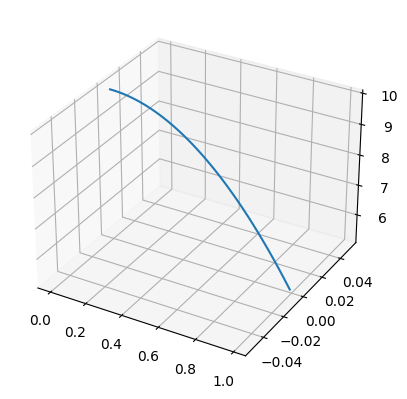

In [11]:
dylan = State()
dylan.pos = np.array((0,0,10),dtype='float64')
dylan.vel = np.array((1,0,0),dtype='float64')
dylan.acc = np.array([0,0,-9.8],dtype='float64')
x = []
y = []
z = []

for _ in range(100):
    x.append(dylan.pos[0])
    y.append(dylan.pos[1])
    z.append(dylan.pos[2])
    
    dylan.update()
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y, z, label='parametric curve')

plt.show()